In [1]:
# Import Library and Data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [3]:
# https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data

In [4]:
df = pd.read_csv('Dummy Data HSS.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [5]:
# Clean Data

In [6]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


In [9]:
df.Influencer.unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [10]:
df['Influencer'] = df['Influencer'].map({'Nano':0, 'Micro':1, 'Macro':2, 'Mega':3})
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,3,54.732757
1,13.0,9.237765,2.409567,3,46.677897
2,41.0,15.886446,2.913410,3,150.177829
3,83.0,30.020028,6.922304,3,298.246340
4,15.0,8.437408,1.405998,1,56.594181


In [11]:
# Descriptive Statistics

In [12]:
df.describe()

,TV,Radio,Social Media,Influencer,Sales
count,4546.000000,4546.000000,4546.000000,4546.00000,4546.000000
mean,54.062912,18.157533,3.323473,1.50198,192.413332
std,26.104942,9.663260,2.211254,1.12071,93.019873
min,10.000000,0.000684,0.000031,0.00000,31.199409
25%,32.000000,10.555355,1.530822,1.00000,112.434612
50%,53.000000,17.859513,3.055565,1.00000,188.963678
75%,77.000000,25.640603,4.804919,3.00000,272.324236
max,100.000000,48.871161,13.981662,3.00000,364.079751


In [13]:
df.corr()

,TV,Radio,Social Media,Influencer,Sales
TV,1.000000,0.869158,0.527687,0.000154,0.999497
Radio,0.869158,1.000000,0.606338,0.003134,0.868638
Social Media,0.527687,0.606338,1.000000,0.019942,0.527446
Influencer,0.000154,0.003134,0.019942,1.000000,0.000532
Sales,0.999497,0.868638,0.527446,0.000532,1.000000


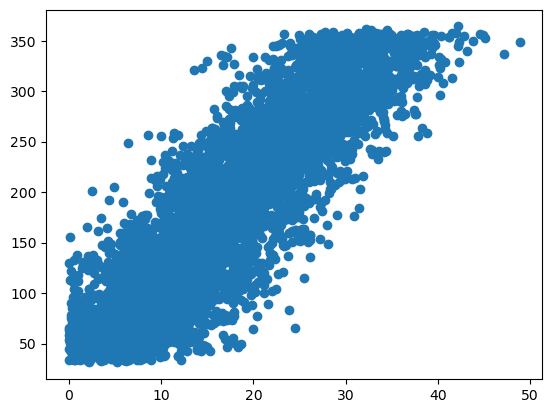

In [14]:
x = df['Radio']
y = df['Sales']
plt.scatter(x, y)

In [15]:
# add ln(x) and interaction term

In [16]:
from numpy import log
df['ln(TV)'] = np.log(df['TV'])
df.head()

,TV,Radio,Social Media,Influencer,Sales,ln(TV)
0,16.0,6.566231,2.907983,3,54.732757,2.772589
1,13.0,9.237765,2.409567,3,46.677897,2.564949
2,41.0,15.886446,2.913410,3,150.177829,3.713572
3,83.0,30.020028,6.922304,3,298.246340,4.418841
4,15.0,8.437408,1.405998,1,56.594181,2.708050


In [17]:
df['Social Media*Influencer'] = df['Social Media']*df['Influencer']
df.head()

,TV,Radio,Social Media,Influencer,Sales,ln(TV),Social Media*Influencer
0,16.0,6.566231,2.907983,3,54.732757,2.772589,8.723948
1,13.0,9.237765,2.409567,3,46.677897,2.564949,7.228702
2,41.0,15.886446,2.913410,3,150.177829,3.713572,8.740231
3,83.0,30.020028,6.922304,3,298.246340,4.418841,20.766912
4,15.0,8.437408,1.405998,1,56.594181,2.708050,1.405998


In [18]:
# Simple linear regression

In [19]:
X = df['TV']
X = sm.add_constant(X)
y = df['Sales']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.517e+06
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:43:17   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4544   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1325      0.101     -1.317      0.1

In [20]:
# A regression without a constant 

In [21]:
X = df['TV']
y = df['Sales']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.386e+07
Date:                Mon, 15 Jul 2024   Prob (F-statistic):                        0.00
Time:                        14:43:17   Log-Likelihood:                         -11367.
No. Observations:                4546   AIC:                                  2.274e+04
Df Residuals:                    4545   BIC:                                  2.274e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
print("R2: ", results.rsquared)

R2:  0.9998095730613074


In [23]:
print("Parameters: ", results.params)

Parameters:  TV    3.559527
dtype: float64


In [24]:
print("Standard errors: ", results.bse)

Standard errors:  TV    0.000729
dtype: float64


In [25]:
# Multiple linear regression with categorical variable

In [26]:
X = df[['TV', 'Social Media', 'Influencer', 'Social Media*Influencer']]
X = sm.add_constant(X)
y = df['Sales']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.129e+06
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:43:18   Log-Likelihood:                -11365.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4541   BIC:                         2.277e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [27]:
# Multicollinearity

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['TV', 'Social Media', 'Influencer', 'Social Media*Influencer']]
X = sm.add_constant(X)
print('    VIF \n===========')
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

    VIF 


const                      11.365353
TV                          1.386174
Social Media                3.255242
Influencer                  3.295400
Social Media*Influencer     5.235476
dtype: float64

In [29]:
# Heteroskedasticity

In [30]:
from statsmodels.stats.diagnostic import het_white
X = df[['TV', 'Social Media', 'Influencer', 'Social Media*Influencer']]
X = sm.add_constant(X)
y = df['Sales']
model = sm.OLS(y, X).fit()
white_test = het_white(model.resid,  model.model.exog)
index = ['Chi-Square-statistic', 'Prob(Chi-Square-statistic)', 'F-statistic' ,'Prob (F-statistic)']
pd.Series(data = white_test, index = index, name = "White Test")

Chi-Square-statistic          11.026224
Prob(Chi-Square-statistic)     0.608621
F-statistic                    0.847615
Prob (F-statistic)             0.609228
Name: White Test, dtype: float64

In [31]:
# regeession with robust standard errors
X = df[['TV', 'Social Media', 'Influencer', 'Social Media*Influencer']]
X = sm.add_constant(X)
y = df['Sales']
model = sm.OLS(y, X)
results = model.fit(cov_type ='HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.150e+06
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:43:18   Log-Likelihood:                -11365.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4541   BIC:                         2.277e+04
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [32]:
# Autocorrelation

In [33]:
X = df[['TV', 'Social Media', 'Influencer', 'Social Media*Influencer']]
X = sm.add_constant(X)
y = df['Sales']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())
# Durbin-Watson

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.129e+06
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:43:18   Log-Likelihood:                -11365.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4541   BIC:                         2.277e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [34]:
# Regression with Newey-West standard errors
X = df[['TV', 'Social Media', 'Influencer', 'Social Media*Influencer']]
X = sm.add_constant(X)
y = df['Sales']
model = sm.OLS(y, X)
results = model.fit(cov_type ='HAC',cov_kwds={'maxlags':1})
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.149e+06
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:43:18   Log-Likelihood:                -11365.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4541   BIC:                         2.277e+04
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [35]:
# Specification Error

In [36]:
from statsmodels.stats.diagnostic import linear_reset
X = df[['TV', 'Social Media', 'Influencer', 'Social Media*Influencer']].to_numpy()
X = sm.add_constant(X)
y = df['Sales'].to_numpy()
model = sm.OLS(y, X).fit()
linear_reset(res = model, power=2, test_type="fitted", use_f=True)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.6942296404892911, p=0.40477326897229504, df_denom=4.54e+03, df_num=1>